# **Customer Segmentation**

**Problem Description:**
In this case study, your task is to identify major customer segments on a transactional data set which contains all the transactions occurring between 01/12/2009 and 09/12/201o for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# **Import the libraries and the dataset to understand the variables present:**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [18,7]
sns.set(rc={'figure.figsize':(18,7)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Customer segmentation/online_retail_II.csv', encoding='ISO-8859-1')

Mounted at /content/drive


In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [ ]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,12/9/2010 20:01,1.95,17530.0,United Kingdom


In [ ]:
len(df)

525461

In [ ]:
df.shape

(525461, 8)

* The shape of our dataset is (525461, 8) which means the dataset has 525461 records and 8 columns.


In [ ]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:
df.dtypes

,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
Price,float64
Customer ID,float64
Country,object


**Data Summary:**

Categorical Variable
* Invoice: 6 digit code assigned to each transaction
* StockCode: 5 digit number assigned to eash product
* Description: Product name
* Customer ID: 5 digit number assigned to each customer
* Country: Country namw

Numirical Variable
* Quantity: Quantities of each product per transaction
* Price: Price per unit

DateTime Object
* InvoiceDate: Day and time of the transaction

# **Information/Description of the Data:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [ ]:
df.duplicated().sum()

np.int64(6865)

In [ ]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


* The dataset contains few null values in the Description and CustomerID column. We will treat them soon before EDA.

* The Quantity and Price column shows the minimum values as negative and as per our knowledge these values might be due to the cancelled orders.

* The distribution of Quantity and Price looks to be skewed as there's a huge difference between the 75th percentile and the maximum value.

**Handling duplicates and missing values in the dataset:**

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [ ]:
df.shape

(410763, 8)

* We have treated the missing values and the duplicated records. After removal of these values, the shape of our dataset is (401604, 8).

* We will now check for the cancelled orders.

In [ ]:
df['Invoice'] = df['Invoice'].astype('str')
df[df['Invoice'].str.startswith('C')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,12/1/2009 10:33,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,12/1/2009 10:33,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,12/1/2009 10:33,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,12/1/2009 10:33,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,12/1/2009 10:33,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,12/9/2010 15:41,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,12/9/2010 15:43,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,12/9/2010 15:43,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,12/9/2010 15:43,12.75,15329.0,United Kingdom


* There are 9816 records where the orders are cancelled and the quantity contains a negative value.

* We will drop these cancelled order records from our analysis.

In [ ]:
# consider only the non cancelled orders
df = df[~df['Invoice'].str.startswith('C')]

# check the shape of the data after removing cancelled orders
df.shape

(400947, 8)

In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,400947.000000,400947.000000,400947.000000
mean,13.768523,3.305571,15361.454639
std,97.639816,35.046376,1680.669487
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13985.000000
50%,5.000000,1.950000,15311.000000
75%,12.000000,3.750000,16805.000000
max,19152.000000,10953.500000,18287.000000


* There are no negative values in the Quantity and UnitPrice column now.

* But we can still see a minimum value of 0 in the UnitPrice column which cannot be real as a store cannot sell items for free.

* We will investigate this column and remove those records.

In [ ]:
df[df['Price'] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,12/2/2009 13:34,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,12/3/2009 11:19,0.0,15658.0,United Kingdom
16107,490727,M,Manual,1,12/7/2009 16:38,0.0,17231.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,12/8/2009 15:25,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,12/8/2009 15:25,0.0,14108.0,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,12/15/2009 13:49,0.0,15070.0,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,12/18/2009 14:22,0.0,18071.0,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,1/6/2010 14:54,0.0,14258.0,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,1/8/2010 10:43,0.0,12417.0,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,1/15/2010 12:43,0.0,16858.0,United Kingdom


* There are few records with zero values in UnitPrice which cannot be true so we will drop these records.

In [ ]:
df = df[df['Price'] > 0]
df.describe()

,Quantity,Price,Customer ID
count,400916.000000,400916.000000,400916.000000
mean,13.767418,3.305826,15361.544074
std,97.638385,35.047719,1680.635823
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13985.000000
50%,5.000000,1.950000,15311.000000
75%,12.000000,3.750000,16805.000000
max,19152.000000,10953.500000,18287.000000


In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [ ]:
df.shape

(400916, 8)

Our dataset is almost a cleaned one now and we can move to EDA but before that we can create some additional features for our dataset.

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")

In [ ]:
df['day'] = df['InvoiceDate'].dt.day_name()
df['year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['month_num'] = df['InvoiceDate'].apply(lambda x: x.month)
df['day_num'] = df['InvoiceDate'].apply(lambda x: x.day)
df['hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['minute'] = df['InvoiceDate'].apply(lambda x: x.minute)
df['month'] = df['InvoiceDate'].dt.month_name()

In [ ]:
df['TotalAmount'] = df['Quantity'] * df['Price']

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,day,year,month_num,day_num,hour,minute,month,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,Tuesday,2009,12,1,7,45,December,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Tuesday,2009,12,1,7,45,December,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Tuesday,2009,12,1,7,45,December,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,Tuesday,2009,12,1,7,45,December,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,Tuesday,2009,12,1,7,45,December,30.0


# **Exploratory Data Analysis:**
We will be discovering insights like:

* Which products are the most and least sold ones?

* Which countries has the most and least number of customers?

* Distribution of the numerical features.

* Which day had the most and least number of purchases?

* Which month had the most and least number of purchases?

* Which hour in a day had the most and least number of purchases?

**Which products are the most sold ones?**

In [ ]:
# count of each product description
desc_df = df['Description'].value_counts().reset_index()
desc_df.head()

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,3107
1,REGENCY CAKESTAND 3 TIER,1695
2,STRAWBERRY CERAMIC TRINKET BOX,1372
3,ASSORTED COLOUR BIRD ORNAMENT,1355
4,HOME BUILDING BLOCK WORD,1192


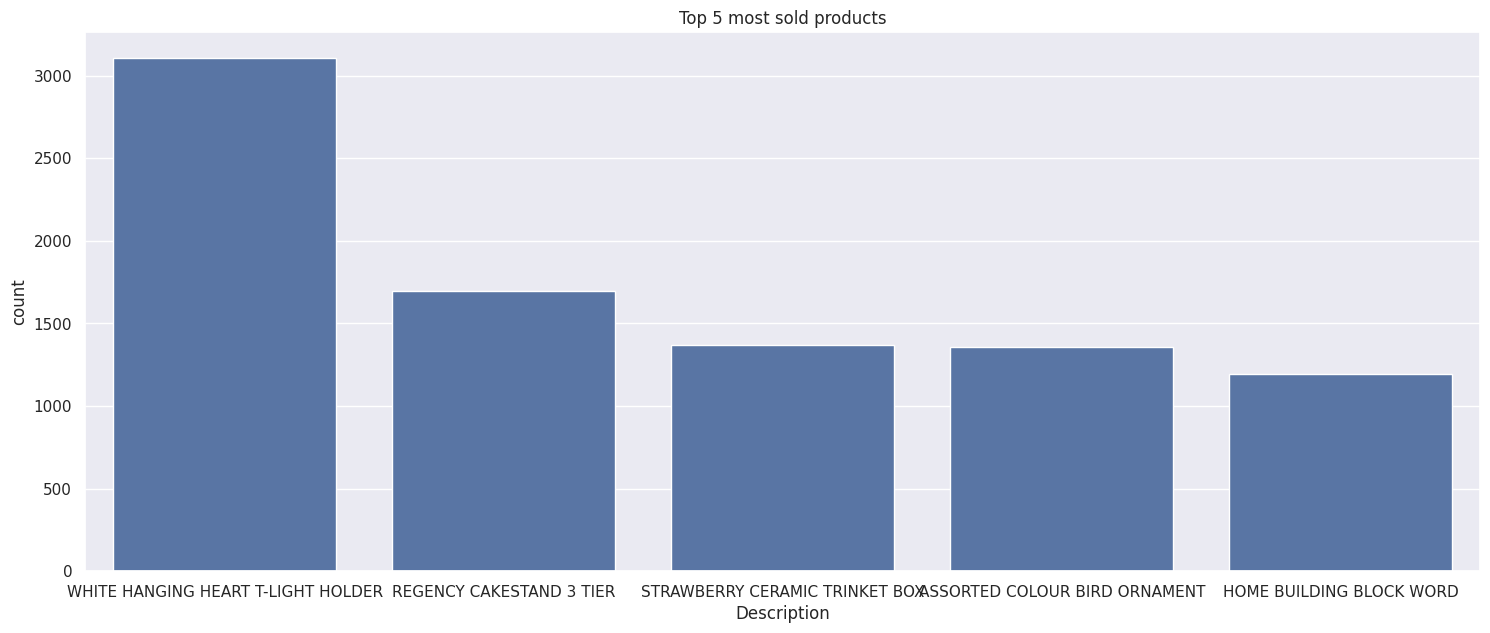

In [ ]:
# plot the top 5 most sold products
sns.barplot(x='Description', y='count', data=desc_df[:5])
plt.title('Top 5 most sold products')
plt.show()

The top 5 most sold products are:

1. White Hanging Heart T-Light Holder

2. Regency Cakestand 3 Tier

3. Jumbo Bag Red Retrospot

4. Assorted Colour Bird Ornament

5. Party Bunting

**Which products are the least sold ones?**

In [ ]:
desc_df.tail()

,Description,count
4439,6 HOOK JEWEL STAND LILAC DRESS,1
4440,PINK CURRENT CANDLE RING,1
4441,WOOD ANIMALS HEIGHT CHART STICKERS,1
4442,BAKING MOULD EASTER EGG MILK CHOC,1
4443,MIDNIGHT BLUE CRYSTAL DROP EARRINGS,1


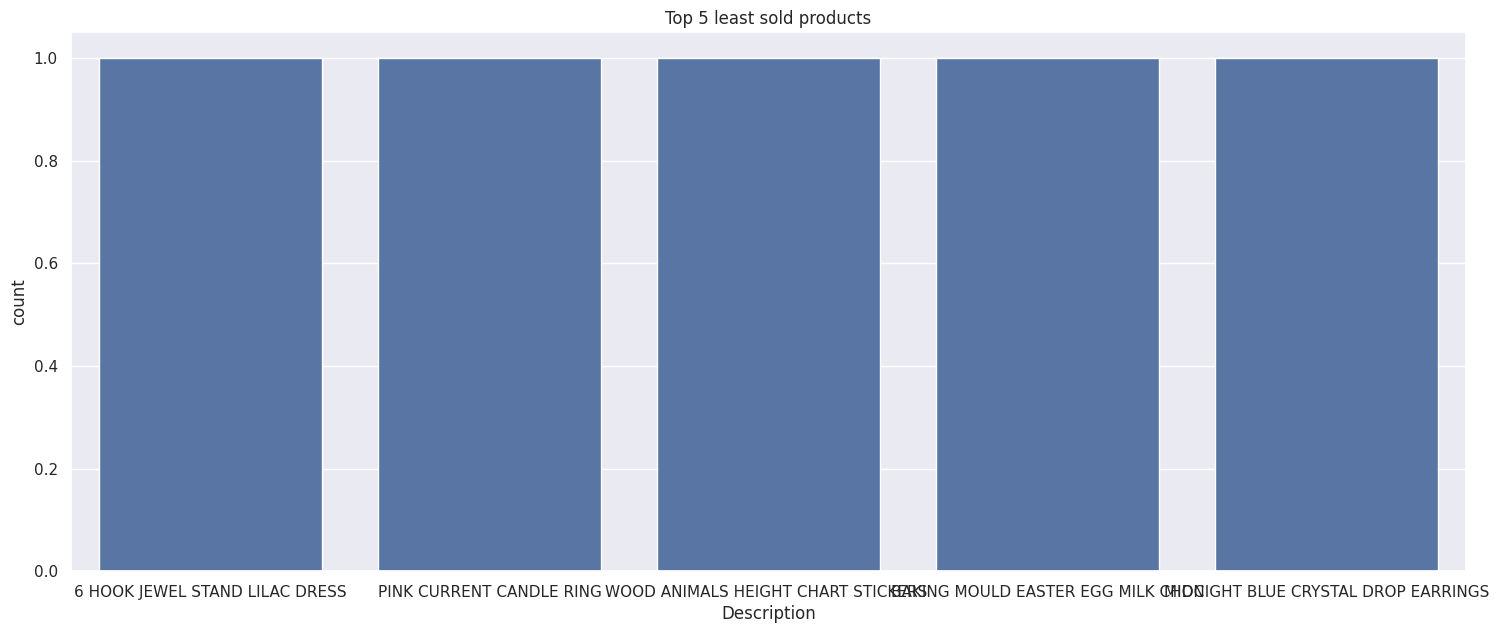

In [ ]:
# plot the top 5 least sold products
sns.barplot(x='Description', y='count', data=desc_df[-5:])
plt.title('Top 5 least sold products')
plt.show()

The top 5 least sold products are:

1. Green with Metal Bag Charm

2. White with Metal Bag Charm

3. Blue/Nat Shell Necklace W Pendant

4. Pink Easter Hens + Flower

5. Paper Craft, Little Birdie

**Which countries has the most number of customers?**

In [ ]:
country_df = df['Country'].value_counts().reset_index()
country_df.head()

,Country,count
0,United Kingdom,364233
1,EIRE,8503
2,Germany,7645
3,France,5452
4,Netherlands,2728


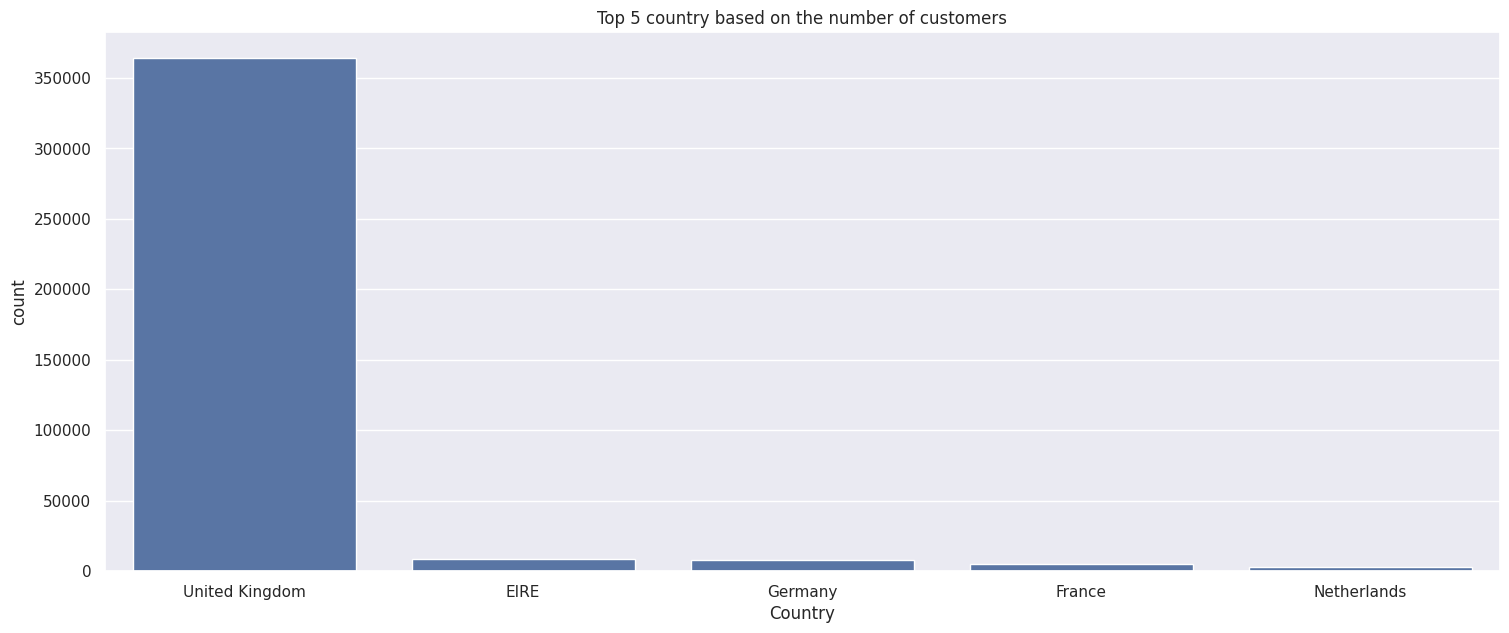

In [ ]:
# plot the top 5 country based on the number of customers
sns.barplot(x='Country', y='count', data=country_df[:5])
plt.title('Top 5 country based on the number of customers')
plt.show()

* As it is an UK based company, a huge chunk of the customers are from United Kingdom only.

* There are very few customers as compared to UK for other countries.

In [ ]:
country_df.tail()

,Country,count
32,Brazil,62
33,West Indies,54
34,Korea,53
35,Bahrain,42
36,Nigeria,30


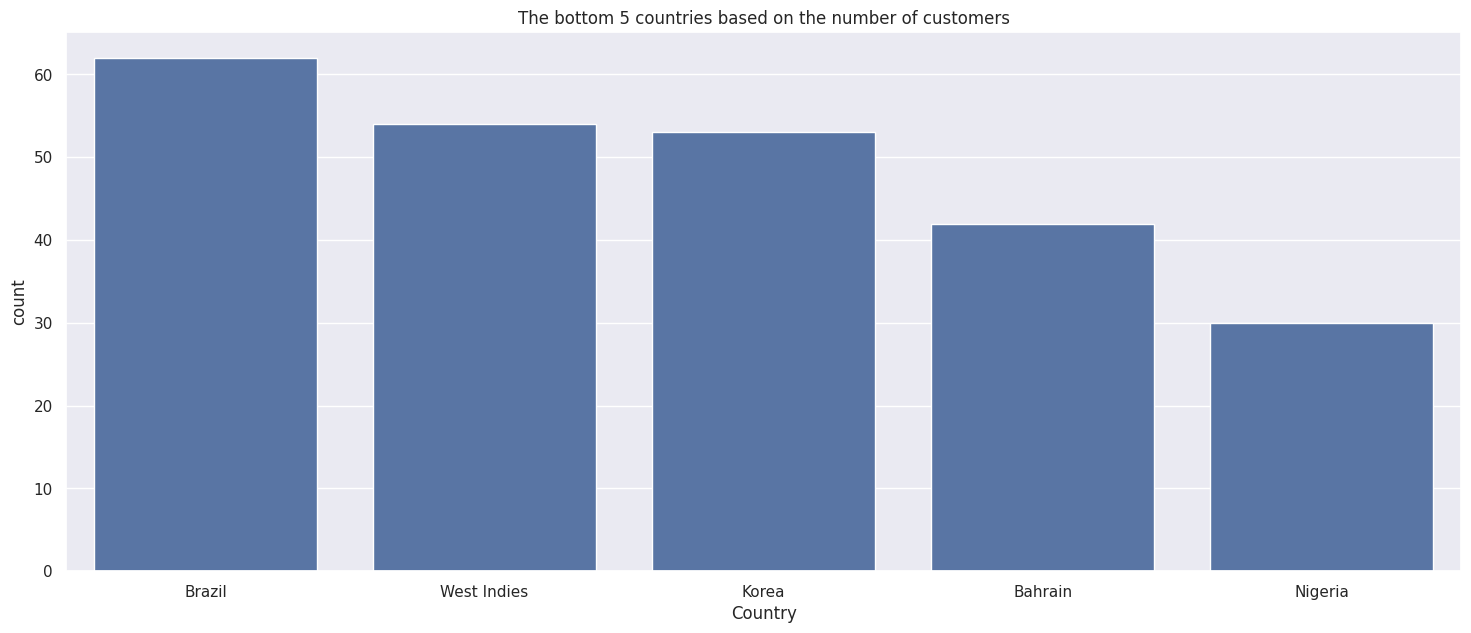

In [ ]:
# plot the bottom 5 countries based on the number of customers
sns.barplot(x='Country', y='count', data=country_df[-5:])
plt.title('The bottom 5 countries based on the number of customers')
plt.show()

Saudi Arabia has the least number of customers followed by Bahrain.

**How many unique customers are there?**

In [ ]:
# number of unique customers
len(df['Customer ID'].unique())

4312

There are 4312 unique customers present in the whole transactional dataset.

**What is the order share of the top 10 customers?**

In [ ]:
# order share of top 10 customers
share_df = (df['Customer ID'].value_counts()/sum(df['Customer ID'].value_counts()) * 100).reset_index()
share_df.columns = ['Customer ID', 'Order Share']
share_df.head(10).cumsum()

,Customer ID,Order Share
0,14911.0,1.388820
1,32752.0,2.621996
2,47358.0,3.570324
3,61514.0,4.230313
4,74262.0,4.861617
5,92112.0,5.484939
6,108661.0,6.025701
7,123972.0,6.534037
8,138618.0,6.976274
9,153145.0,7.406539


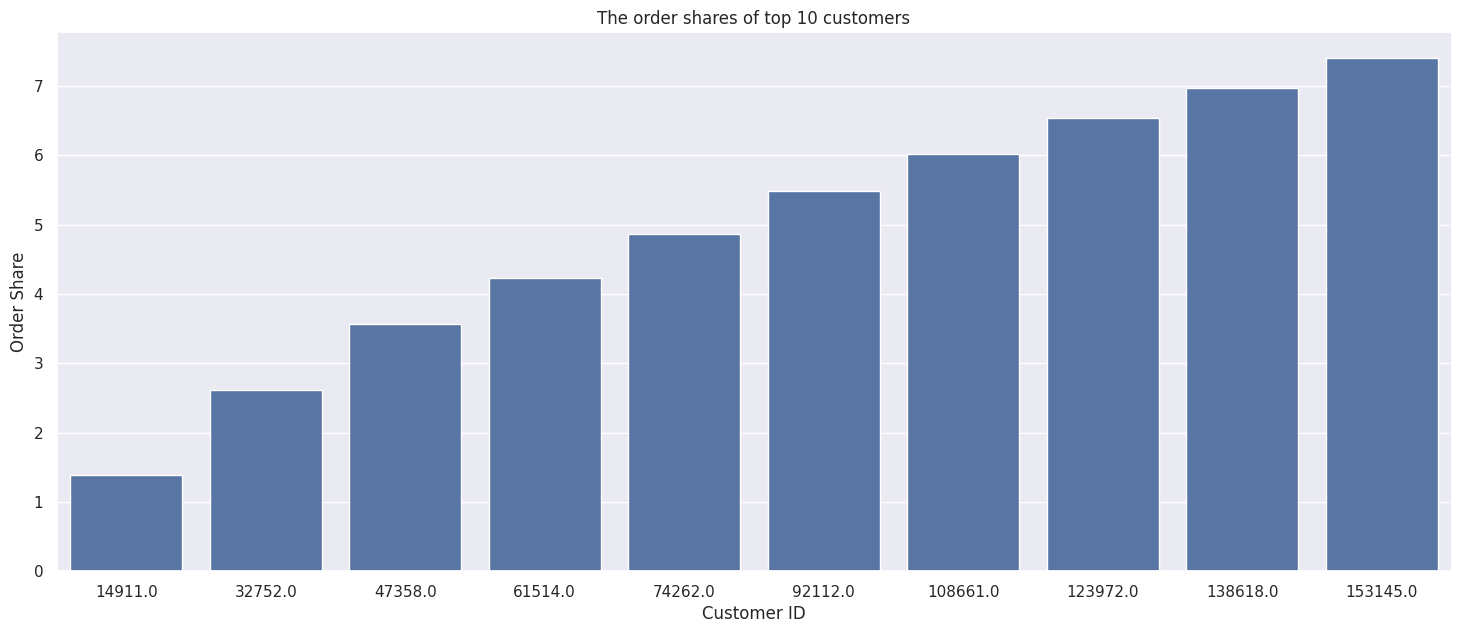

In [ ]:
# plot the top 10 customer's order share
sns.barplot(x='Customer ID', y='Order Share', data=share_df[:10].cumsum())
plt.title('The order shares of top 10 customers')
plt.show()

* We can observe that only 10 customers out of 4338 unique customers are responsible for approx 9% of the total orders.

* We can infer that these customers might be wholesalers.

**Let us check the distribution of the numerical features:**

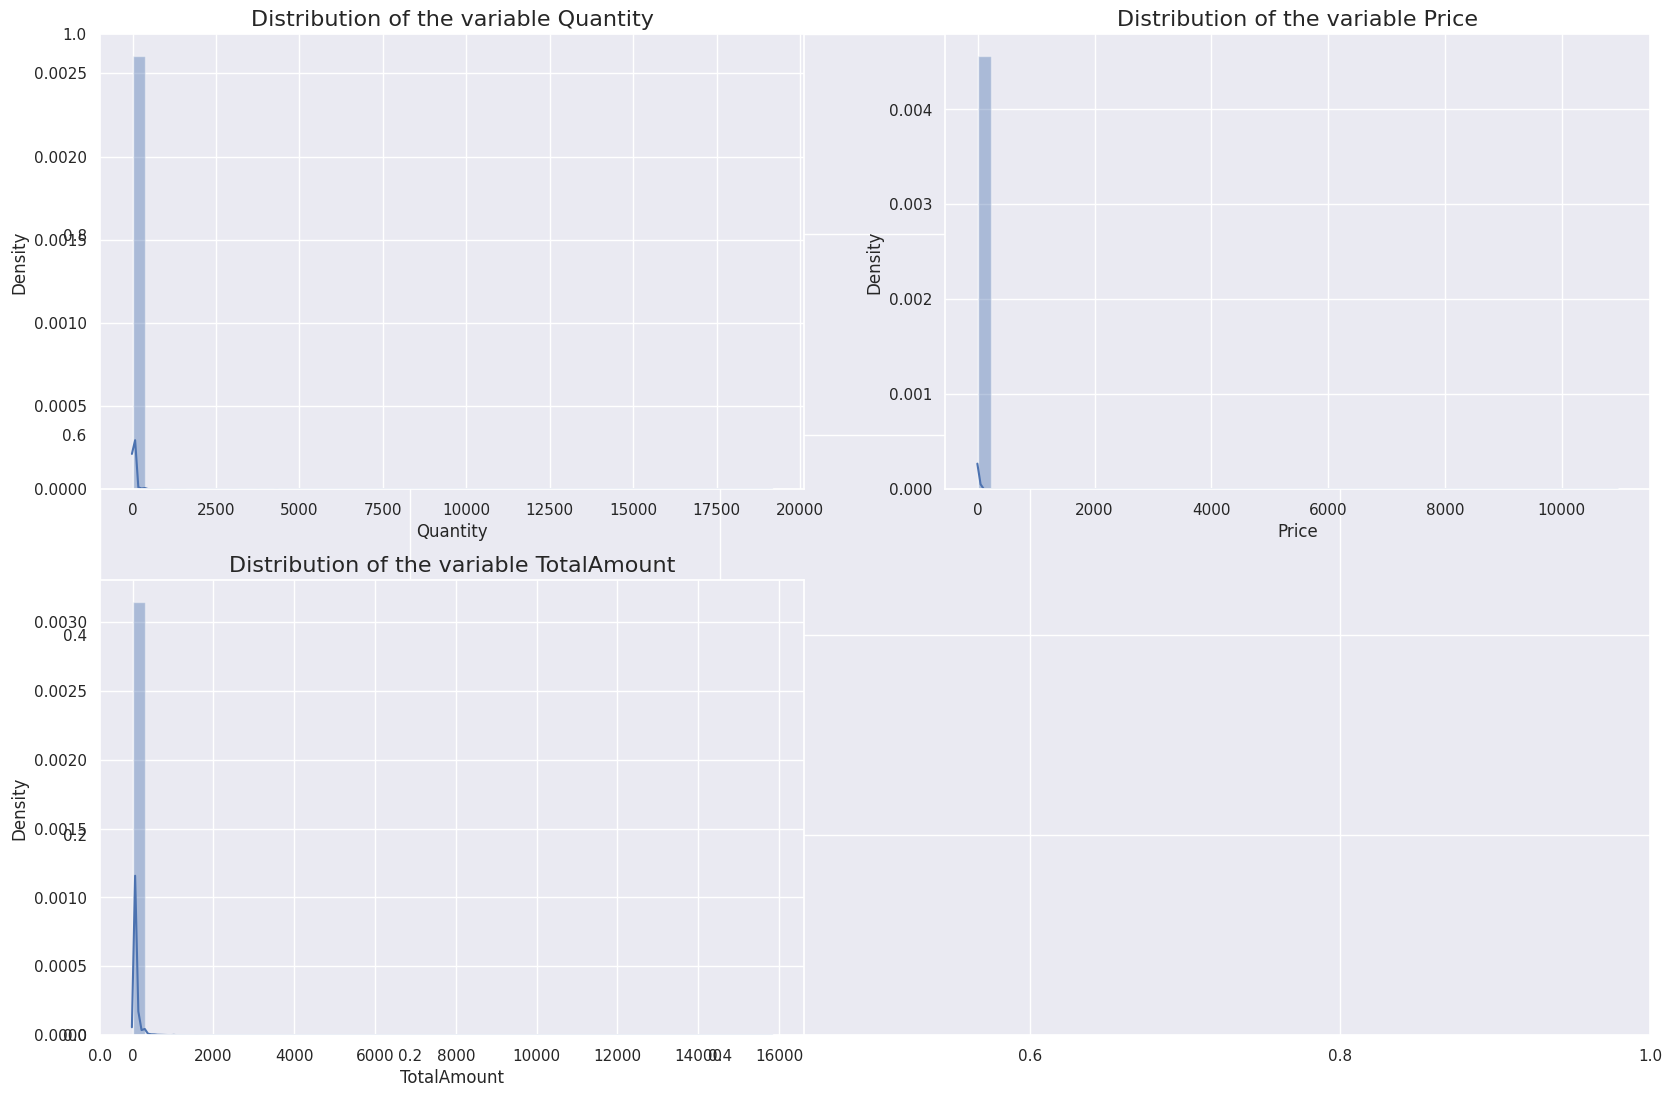

In [ ]:
# plot the distribution of the numerical features
num_features = ['Quantity', 'Price', 'TotalAmount']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

The distribution of all the variables are heavily right skewed.

We will apply log transformation on these variables to make it less skewed.

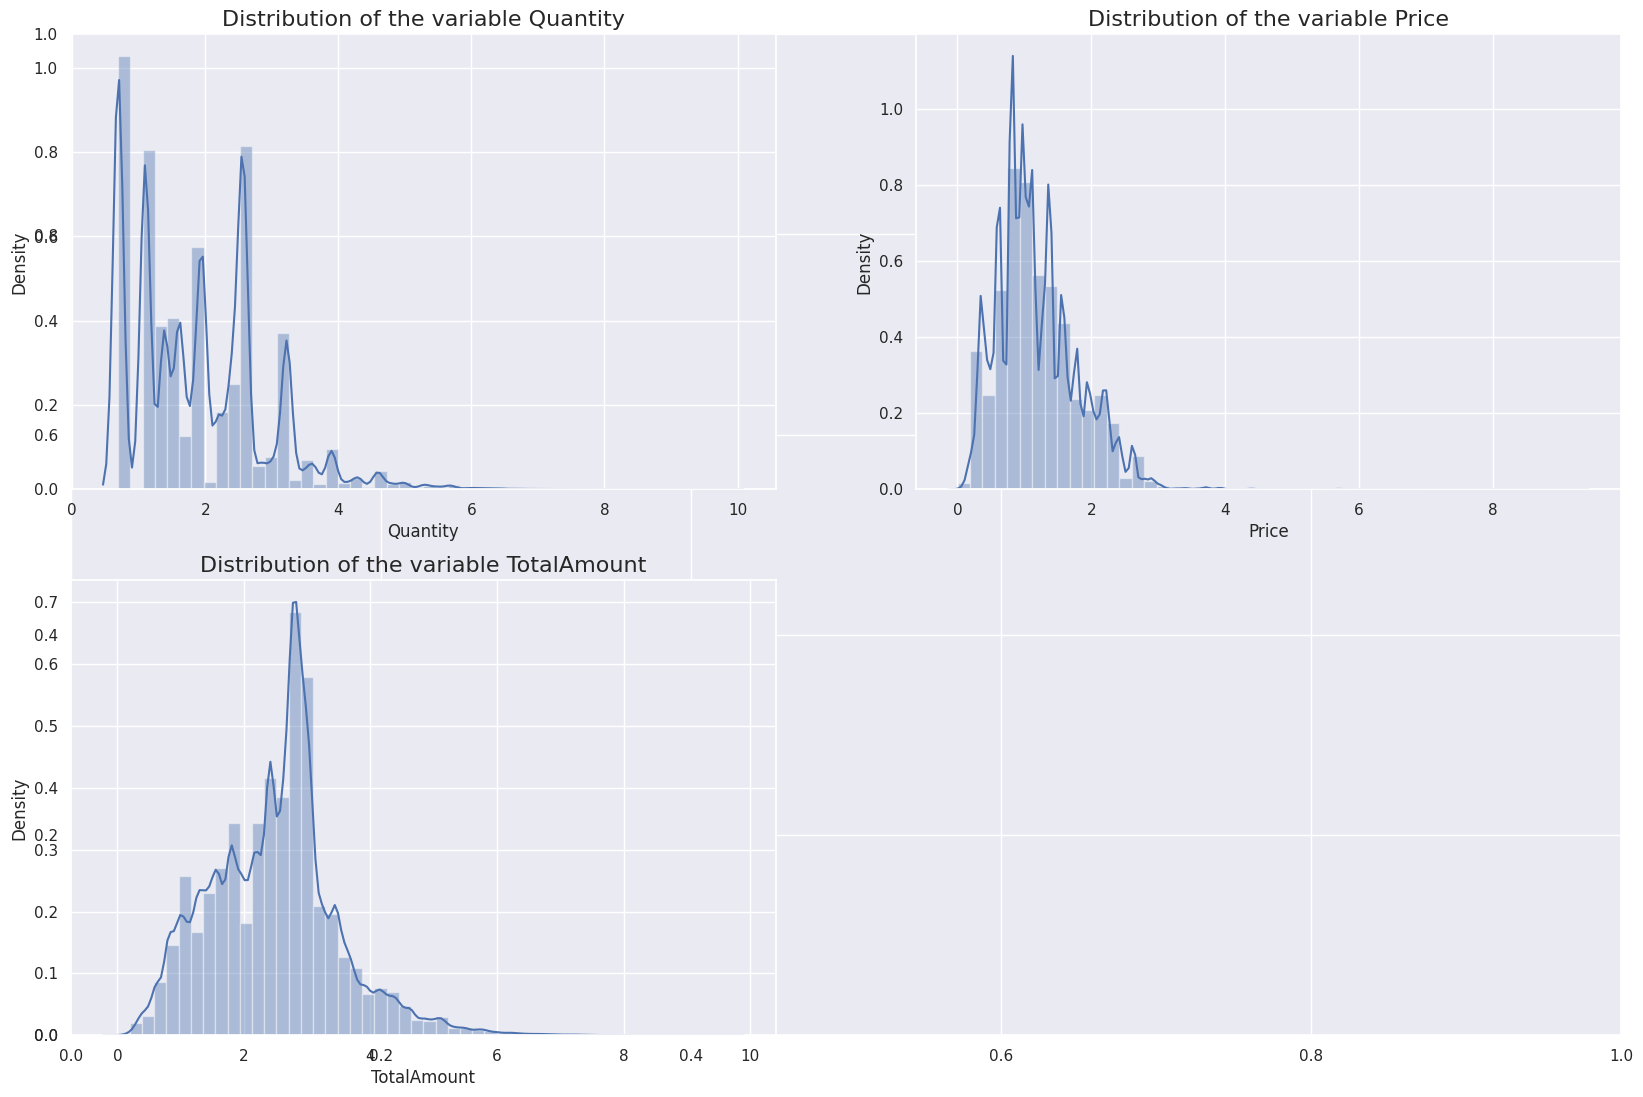

In [ ]:
# taking a log transformation
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(np.log1p(df[feature]))
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

The variables after log transformation are less skewed than before.

It isn't a normal distribution but somewhat close to that than before.

**Which day of the week had the most and the least number of purchases?**

In [ ]:
# number of purchases w.r.t the day of the week
day_df = df['day'].value_counts().reset_index()
day_df

,day,count
0,Thursday,80441
1,Sunday,71527
2,Tuesday,69371
3,Wednesday,66544
4,Monday,62613
5,Friday,50020
6,Saturday,400


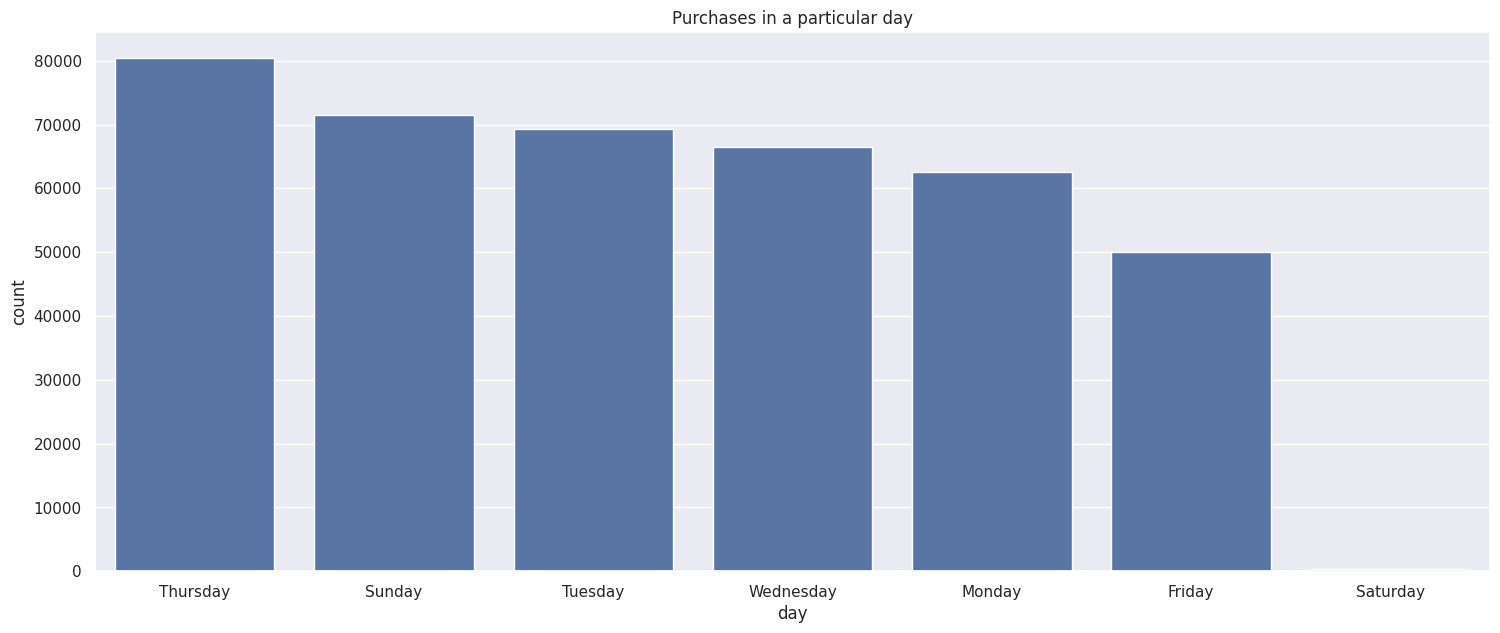

In [ ]:
# plot the number of purchases w.r.t day of the week
sns.barplot(x='day', y='count', data=day_df)
plt.title('Purchases in a particular day')
plt.show()

Most of the customers have made a purchase in Thursday followed by Wednesday.

Friday is the day with least number of purchases made.

**Which month had the most and the least number of purchases?**

In [ ]:
# number of purchases w.r.t month
month_df = df['month'].value_counts().reset_index()
month_df

,month,count
0,November,58905
1,October,48723
2,December,44456
3,September,34128
4,March,31782
5,June,30688
6,May,28233
7,April,26831
8,July,26643
9,August,26029


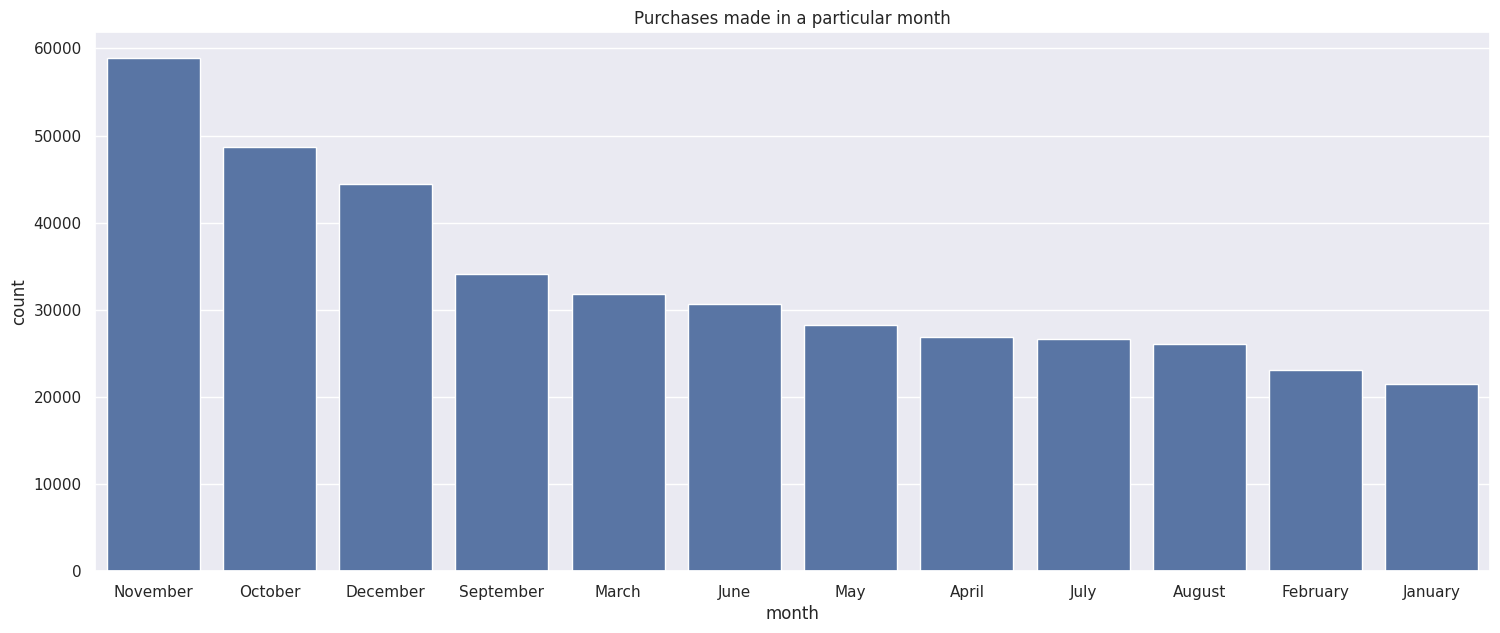

In [ ]:
# plot the number of purchases w.r.t month
sns.barplot(x='month', y='count', data=month_df)
plt.title('Purchases made in a particular month')
plt.show()

The most number of purchases are made during October to December which is a festive season for many people.

The least number of purchases are made during the initial months of a year, January and February which is quite obvious because as soon as the festive season ends, purchases or sales will go down.

**Which hour of the day had the most and the least number of purchases?**

In [ ]:
# number of purchases w.r.t hour of the day
hour_df = df['hour'].value_counts().reset_index()
hour_df

,hour,count
0,12,71044
1,13,66191
2,14,55273
3,11,50124
4,15,43110
5,10,35812
6,16,28329
7,9,19604
8,17,13681
9,8,6644


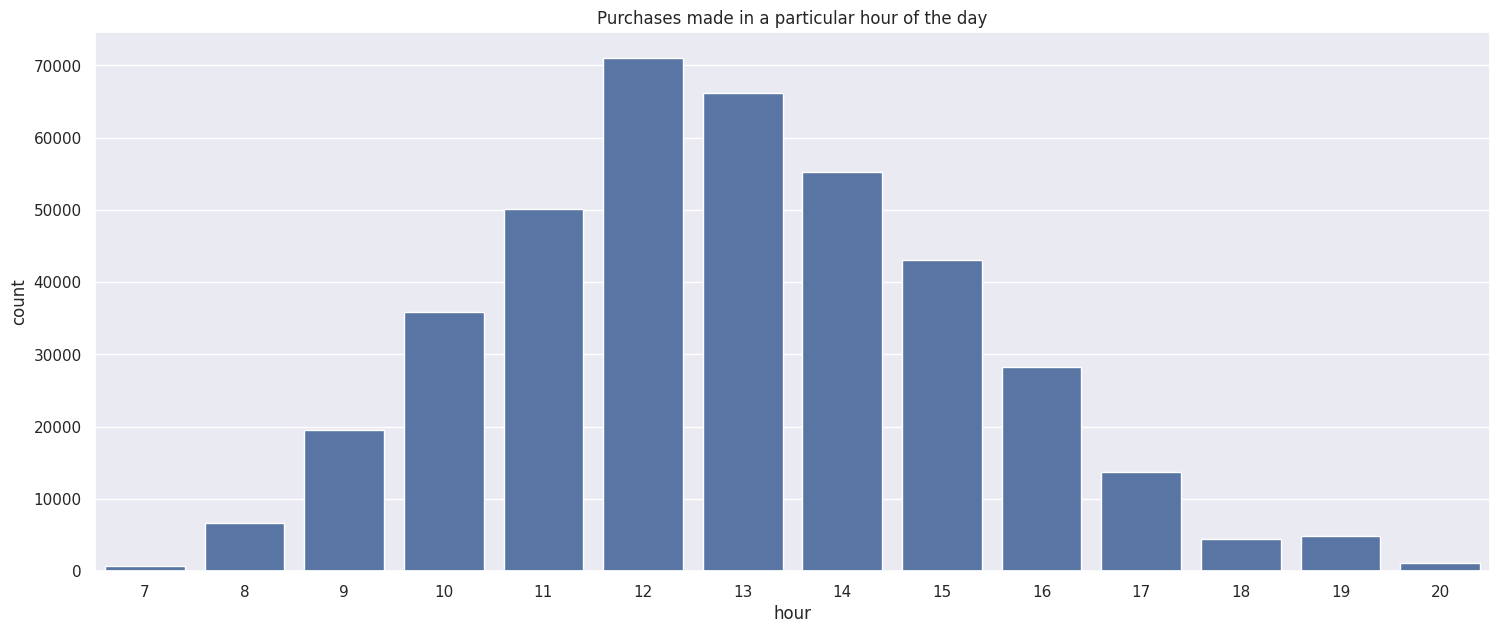

In [ ]:
# plot the number of purchases w.r.t hour of the day
sns.barplot(x='hour', y='count', data=hour_df)
plt.title('Purchases made in a particular hour of the day')
plt.show()

Most of the purchases are around the afternoon period and a very few number of purchases during morning or evening.

We can bucket this hour graph into morning, afternoon and evening buckets.

In [ ]:
# group the time into 3 buckets
def time_day(time):
  if (time >= 6 and time <= 11):
    return 'Morning'
  elif (time >= 12 and time <= 17):
    return 'Afternoon'
  else:
    return 'Evening'

# apply the function into the column
df['time_day'] = df['hour'].apply(time_day)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,day,year,month_num,day_num,hour,minute,month,TotalAmount,time_day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,Tuesday,2009,12,1,7,45,December,83.4,Morning
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Tuesday,2009,12,1,7,45,December,81.0,Morning
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Tuesday,2009,12,1,7,45,December,81.0,Morning
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,Tuesday,2009,12,1,7,45,December,100.8,Morning
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,Tuesday,2009,12,1,7,45,December,30.0,Morning


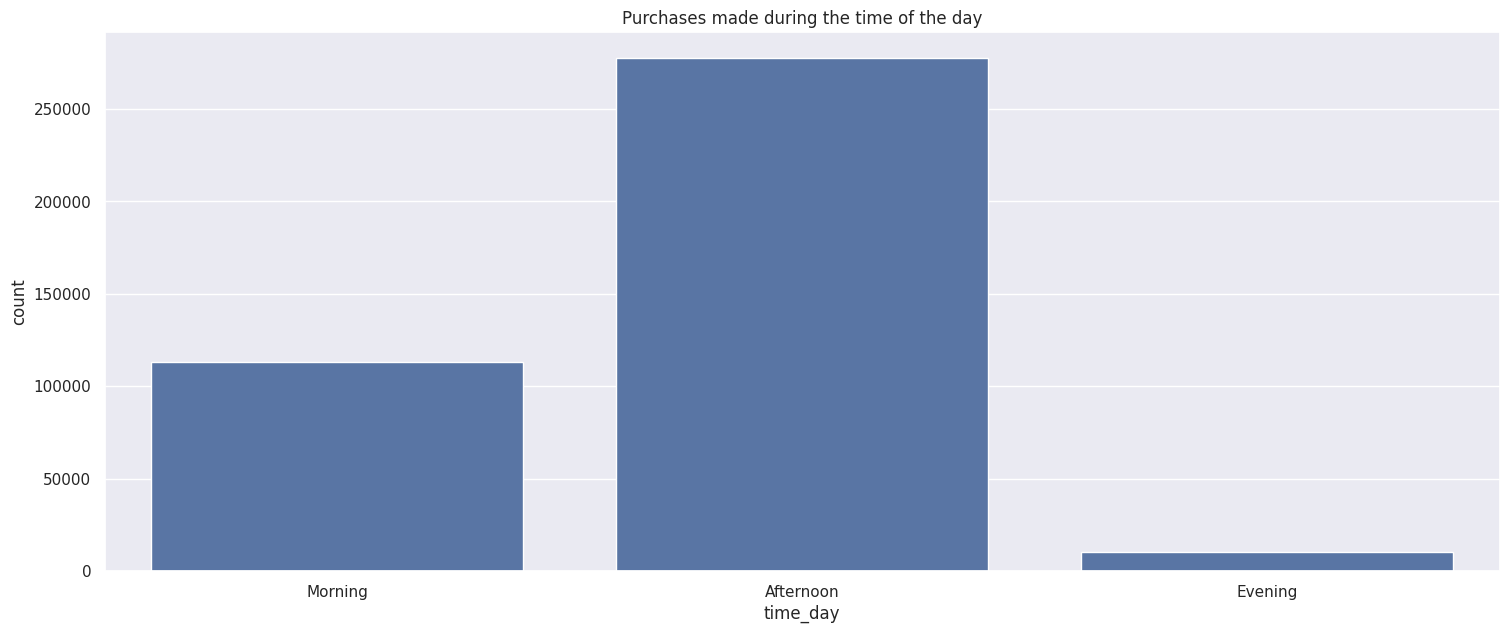

In [ ]:
# plot the number of purchases w.r.t hour again
sns.countplot(x='time_day', data=df)
plt.title('Purchases made during the time of the day')
plt.show()

Now, it is more clear that most of the purchases has occurred during the Afternoon followed by Morning and the least number of purchases during Evening.

# **Let us create the RFM Model (Recency, Frequency and Monetary):**

In [ ]:
# filter UK data only
df = df[df['Country'] == 'United Kingdom']

# print the shape of the data
df.shape

(364233, 17)

**Calculating RFM Scores:**

In [ ]:
# calculating RFM scores
# set latest date to '2011-12-10' as the last invoice date was '2011-12-09'
latest_date = dt.datetime(2011,12,10)

# create rfm modeling scores for each customer
rfm_df = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'Invoice': lambda x: len(x),
                                            'TotalAmount': lambda x: x.sum()})

# convert invoice date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# rename columns to frequency, recency, monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,529,33,372.86
1,12608.0,404,16,415.79
2,12745.0,486,22,723.85
3,12746.0,540,17,254.55
4,12747.0,369,153,5061.03


In [ ]:
# descriptive stats of the rfm dataframe
rfm_df.describe()

,Recency,Frequency,Monetary
count,3969.000000,3969.000000,3969.00000
mean,455.095742,91.769463,1859.82475
std,97.072657,179.558147,7377.48894
min,365.000000,1.000000,2.95000
25%,382.000000,18.000000,301.65000
50%,416.000000,43.000000,663.31000
75%,500.000000,100.000000,1648.18000
max,738.000000,4944.000000,349164.35000


**Let us plot the distribution of Recency, Frequency and Monetary Value:**

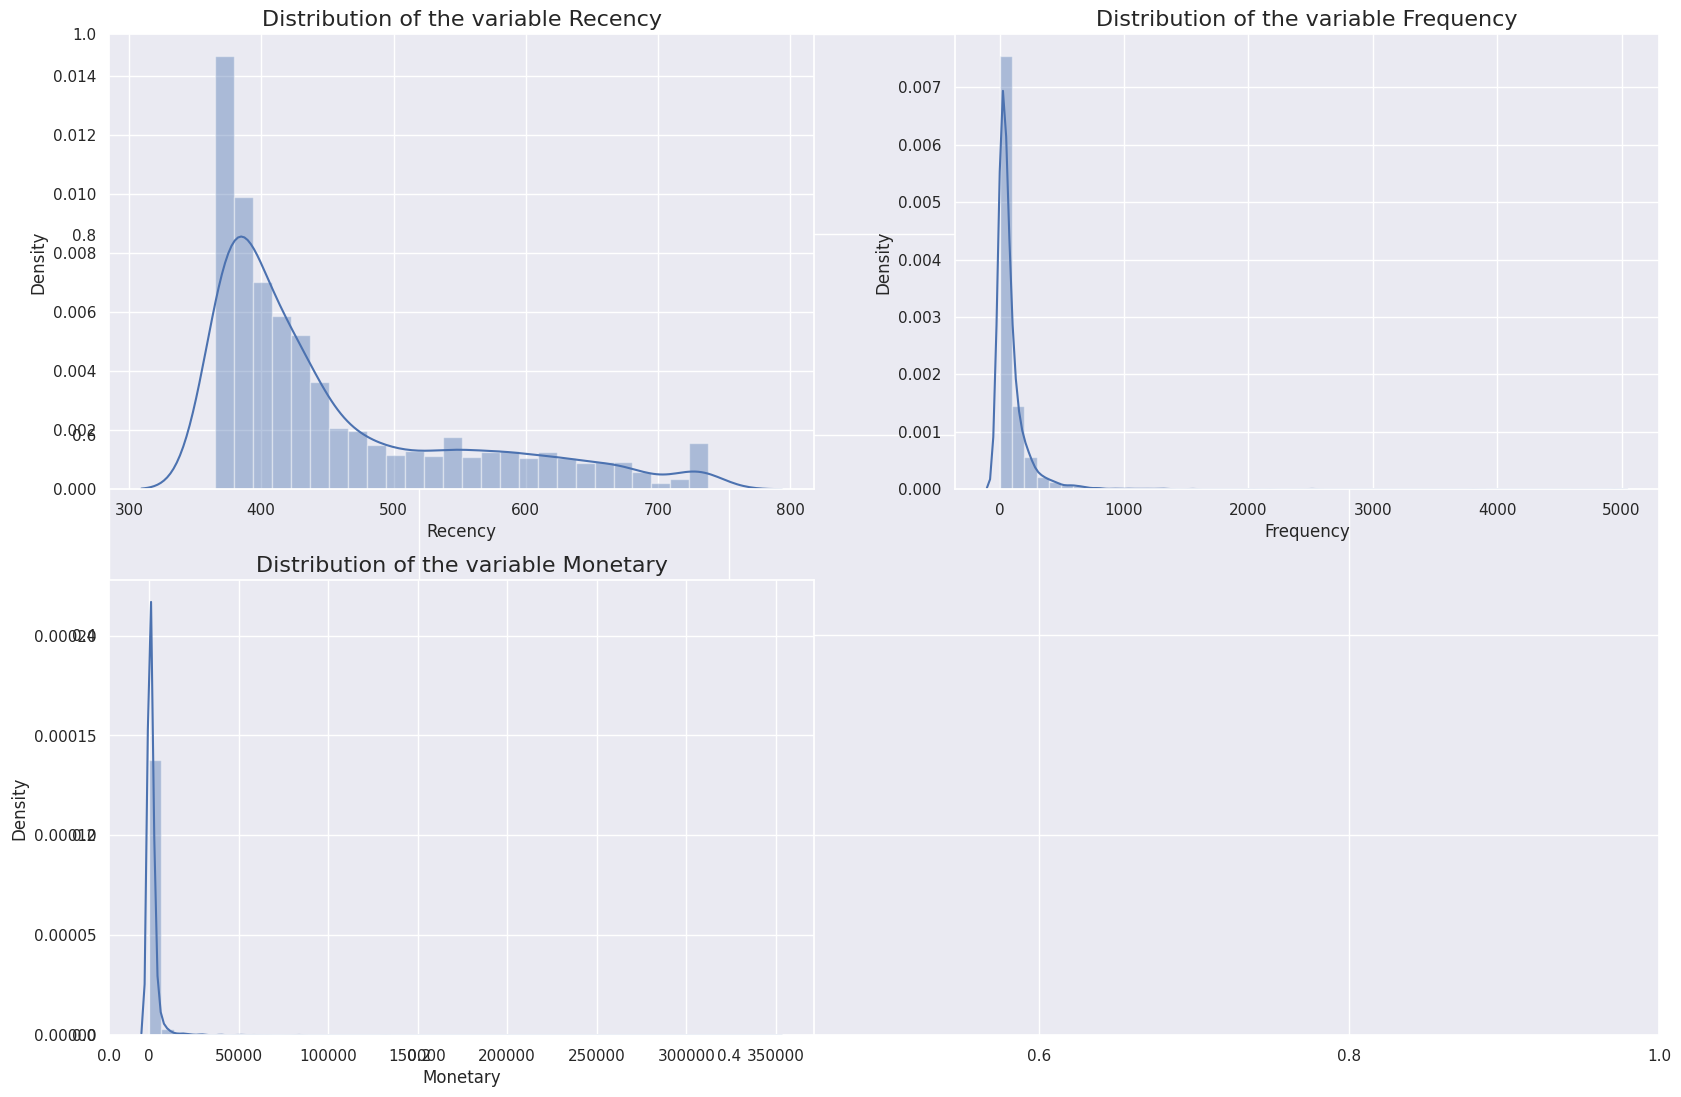

In [ ]:
# plot the distribution of the RFM values
count = 1
plt.subplots(figsize=(20,13))
for feature in rfm_df:
  plt.subplot(2,2,count)
  sns.distplot(rfm_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

# **Apply log transformation to the RFM values and plot each distribution:**

In [ ]:
# treat the negative and zero values to handle infinite numbers during log transformation
def handle_negative(num):
  if num <= 0:
    return 1
  else:
    return num

# apply the function to recency and monetary columns
rfm_df['Recency'] = [handle_negative(x) for x in rfm_df['Recency']]
rfm_df['Monetary'] = [handle_negative(x) for x in rfm_df['Monetary']]

# apply log transfomation to RFM values
log_df = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

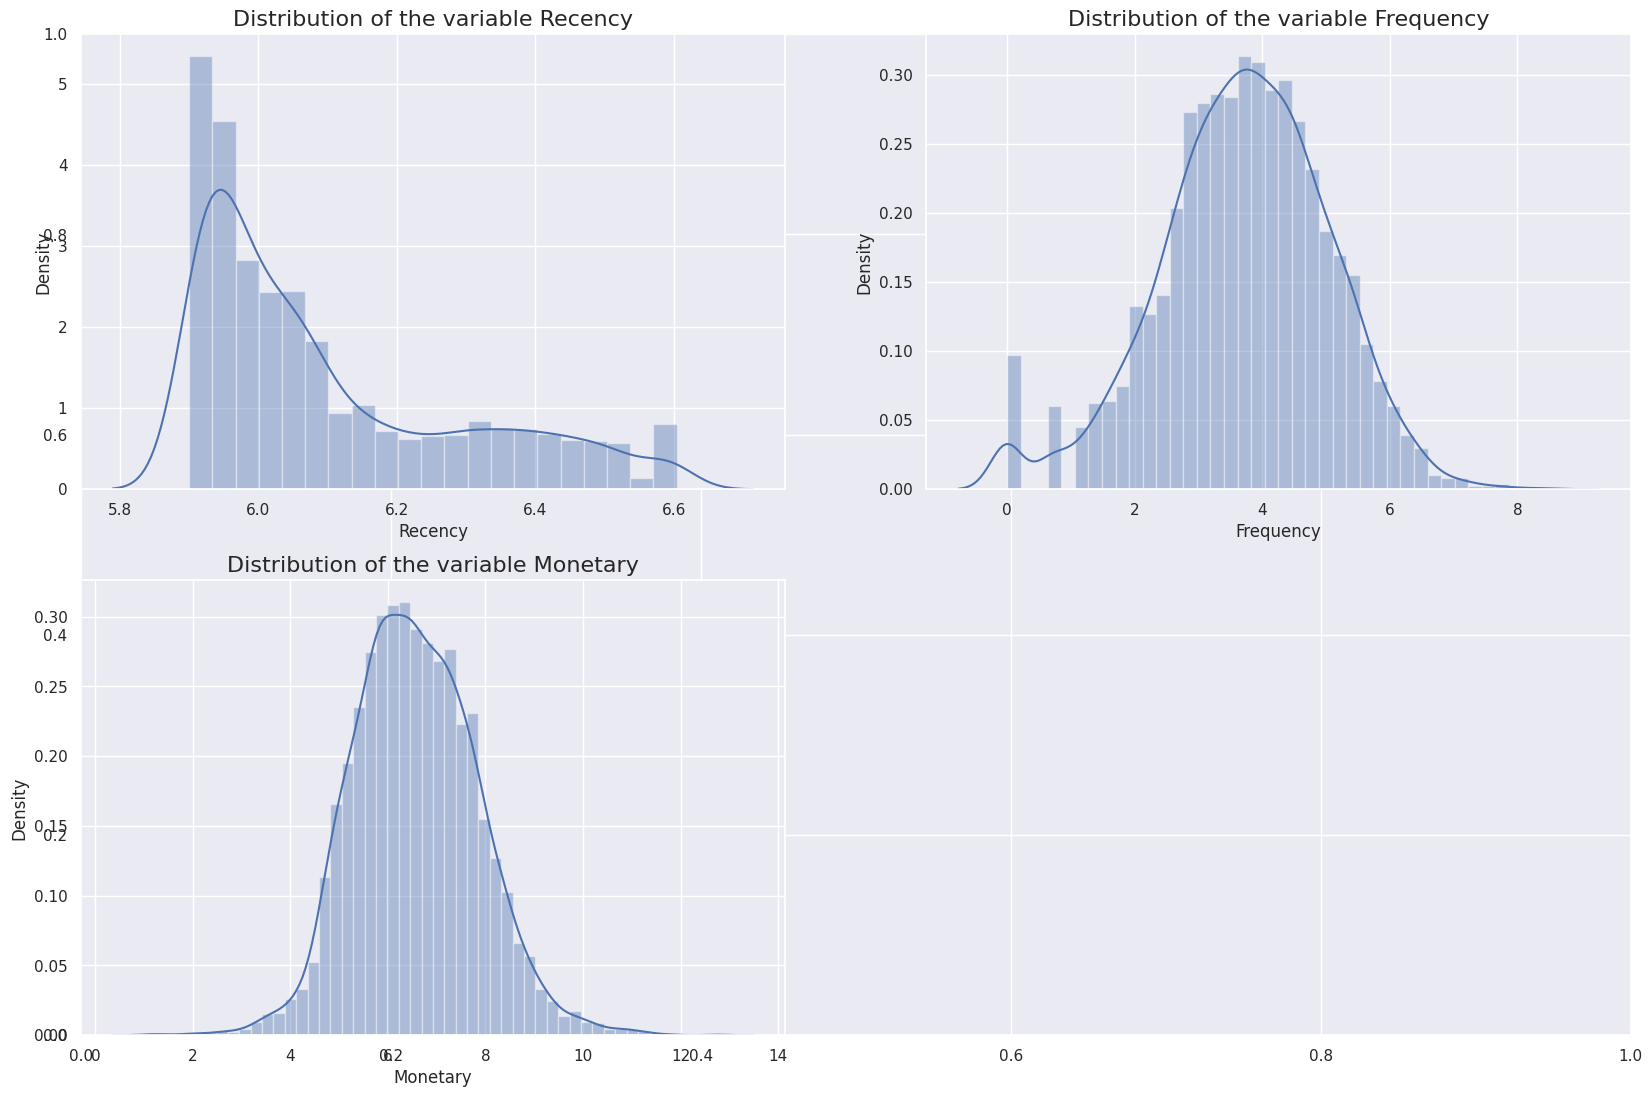

In [ ]:
# plot the log transformed distribution
count = 1
plt.subplots(figsize=(20,13))
for feature in log_df:
  plt.subplot(2,2,count)
  sns.distplot(log_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

The distribution of Recency, Frequency and Monetary values almost looks normal now.

In [ ]:
# apply log transformation on the original rfm dataframe
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [ ]:
# display the rfm_df
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
Customer ID,,,,,,
12346.0,529,33,372.86,6.270988,3.496508,5.921203
12608.0,404,16,415.79,6.001415,2.772589,6.030180
12745.0,486,22,723.85,6.186209,3.091042,6.584584
12746.0,540,17,254.55,6.291569,2.833213,5.539497
12747.0,369,153,5061.03,5.910797,5.030438,8.529325


In [ ]:
features = ['Recency_log', 'Frequency_log', 'Monetary_log']

# scaling our data
X_features = rfm_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

# **Applying Elbow method on Recency, Frequency and Monetary:**

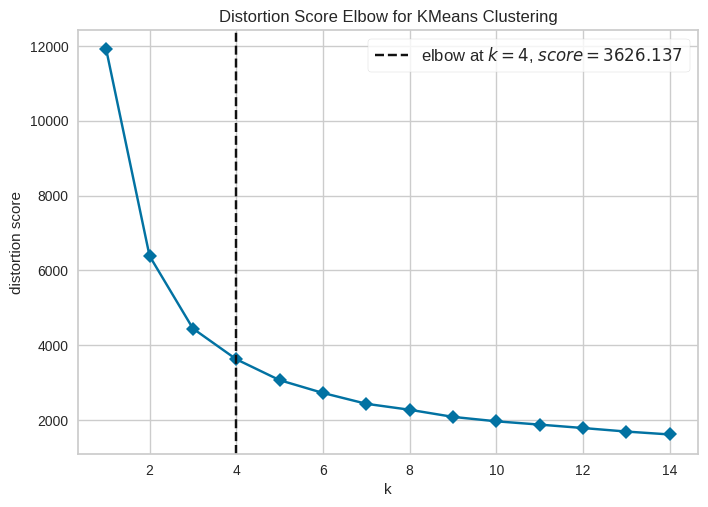

In [ ]:
# elbow method to find out the best k
from yellowbrick.cluster import KElbowVisualizer
SSE = {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km = km.fit(X)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()

* From the elbow method we reach the conclusion that the optimal number of clusters is 3 for Recency, Frequency and Monetary values.

*  We will again run the model with number of clusters as 3.

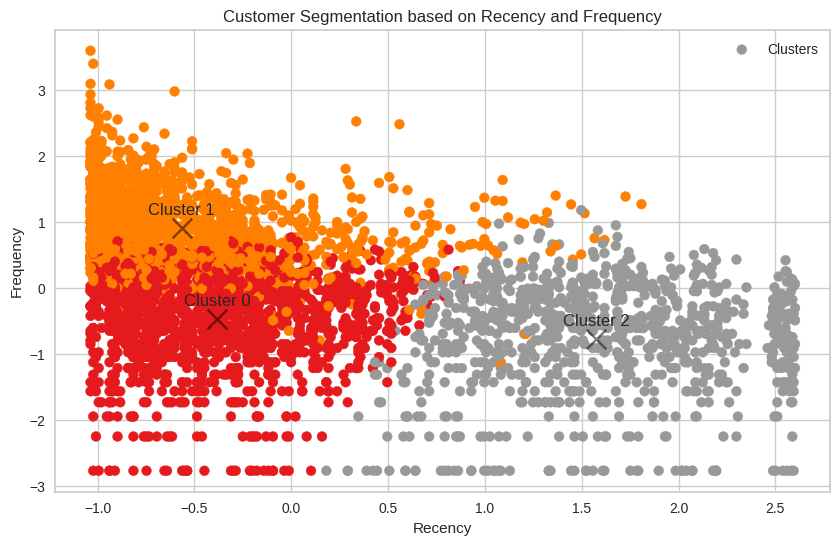

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X is your data array
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_km = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Set1', label='Clusters')

# Plot and annotate the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We can observe three clusters from the KMeans model applied on Recency, Frequency and Monetary data.

# **Interpreting the Clusters with the help of RFM Group:**

**Now, split the RFM values into four quantiles:**

In [ ]:
# split the rfm values into four quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
# function to create R, F, M segments
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [ ]:
# calculate RFM segment values for each record
rfm_df['R'] = rfm_df['Recency'].apply(RScore, args=('Recency', quantiles, ))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScore, args=('Frequency', quantiles, ))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScore, args=('Monetary', quantiles, ))
rfm_df.reset_index().head()

,Customer ID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M
0,12346.0,529,33,372.86,6.270988,3.496508,5.921203,4,3,3
1,12608.0,404,16,415.79,6.001415,2.772589,6.030180,2,4,3
2,12745.0,486,22,723.85,6.186209,3.091042,6.584584,3,3,2
3,12746.0,540,17,254.55,6.291569,2.833213,5.539497,4,4,4
4,12747.0,369,153,5061.03,5.910797,5.030438,8.529325,1,1,1


**Calculate RFM Group and RFM Score from the RFM segmentation:**

In [ ]:
# add RFM group column
rfm_df['RFMGroup'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# calculate RFM score from RFM group column
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)
rfm_df.reset_index().head()

,Customer ID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
0,12346.0,529,33,372.86,6.270988,3.496508,5.921203,4,3,3,433,10
1,12608.0,404,16,415.79,6.001415,2.772589,6.030180,2,4,3,243,9
2,12745.0,486,22,723.85,6.186209,3.091042,6.584584,3,3,2,332,8
3,12746.0,540,17,254.55,6.291569,2.833213,5.539497,4,4,4,444,12
4,12747.0,369,153,5061.03,5.910797,5.030438,8.529325,1,1,1,111,3


In [ ]:
# find the clusters for the observations in the dataset
rfm_df['Cluster'] = kmeans.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore,Cluster
Customer ID,,,,,,,,,,,,
12346.0,529,33,372.86,6.270988,3.496508,5.921203,4,3,3,433,10,2
12608.0,404,16,415.79,6.001415,2.772589,6.030180,2,4,3,243,9,0
12745.0,486,22,723.85,6.186209,3.091042,6.584584,3,3,2,332,8,0
12746.0,540,17,254.55,6.291569,2.833213,5.539497,4,4,4,444,12,2
12747.0,369,153,5061.03,5.910797,5.030438,8.529325,1,1,1,111,3,1


In [ ]:
# Group by cluster label and calculate mean
cluster_averages = rfm_df.groupby('Cluster').mean(numeric_only=True)
cluster_averages

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMScore
Cluster,,,,,,,,,,
0,415.799322,29.457627,500.667736,6.026633,3.070144,5.959055,2.242712,3.134915,3.076610,8.454237
1,401.686824,190.727562,3994.288166,5.990897,4.915055,7.742123,1.863144,1.416295,1.425843,4.705283
2,608.798483,22.914410,398.843784,6.405346,2.663657,5.551745,3.972914,3.386782,3.408451,10.768147


# **Interpretation:**

1. Cluster 0:

Recency: Very High (average around 401 days)

Frequency: Very High (average around 192 transactions)

Monetary: Very High (average around $4025)

Interpretation: This cluster represents your 'Champions' or 'Loyal' customers. They shop frequently, recently, and spend the most. They are the most valuable segment, likely to respond positively to new offers, up-sell and cross-sell opportunities. Maintaining their high engagement level is crucial, and they can also be targeted for feedback or as brand ambassadors.

Cluster 1:

Recency: High (average around 608 days)

Frequency: Low (average around 22 transactions)

Monetary: Low (average around $398)

Interpretation: Customers in this cluster are likely to be 'At-Risk' or 'Lapsed' customers. They haven't made purchases recently, and when they did, they didn't do so very frequently and didn't spend much. These customers might have been one-time buyers or occasional shoppers. Engaging them with reactivation campaigns or exploring why they haven’t returned can be a strategic move.

Cluster 2:

Recency: High (average around 415 days)

Frequency: Moderate (average around 29 transactions)

Monetary: High (average around $505)

Interpretation: Customers in this cluster can be seen as 'Potential Loyalists' or 'Promising' customers. They have a balanced score in all three RFM metrics. These customers have the potential to become more valuable if properly engaged. Tailored marketing strategies, loyalty programs, and incentives to increase their purchase frequency and value can be effective.
Overall Strategy:

Cluster 0 ('Champions/Loyal'): Prioritize maintaining their high level of engagement. Offer exclusive deals, loyalty programs, and early access to new products. They can also be engaged in referral programs.

Cluster 1 ('At-Risk/Lapsed'): Focus on re-engagement strategies. Understand their needs and reasons for not returning. Offer incentives or feedback surveys to encourage them to revisit and make purchases.

Cluster 2 ('Potential Loyalists/Promising'): Encourage them to visit and buy more often. Personalized communication, recommending products based on past purchases, and loyalty rewards can be effective.

Thus, from our comparison table we can conclude that KMeans clustering on Recency, Frequency and Monetary data gives us the best result with the optimal number of clusters as 3. We can use this model to cluster our data in 3 segments and develop better marketing strategies.